In [2]:
import torch

if torch.cuda.is_available():    
  
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1660 Ti with Max-Q Design


In [3]:
!pip install transformers

2 Parse

In [4]:
import pandas as pd
df = pd.read_csv('C:/Users/DELL/Desktop/cola_public/raw/in_domain_train.tsv',delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
df

,sentence_source,label,label_notes,sentence
0,gj04,1,NaN,"Our friends won't buy this analysis, let alone..."
1,gj04,1,NaN,One more pseudo generalization and I'm giving up.
2,gj04,1,NaN,One more pseudo generalization or I'm giving up.
3,gj04,1,NaN,"The more we study verbs, the crazier they get."
4,gj04,1,NaN,Day by day the facts are getting murkier.
...,...,...,...,...
8546,ad03,0,*,Poseidon appears to own a dragon
8547,ad03,0,*,Digitize is my happiest memory
8548,ad03,1,NaN,It is easy to slay the Gorgon.
8549,ad03,1,NaN,I had the strangest feeling that I knew you.


In [5]:
df.loc[df.label == 0].sample(50)[['sentence', 'label']]

,sentence,label
5465,I have six of them more.,0
2105,I lent Tony the book halfway.,0
591,the bottle drained the liquid free.,0
3188,She always clad herself in black.,0
3477,the box contains little tool.,0
496,They tried all to like John.,0
7365,It mattered with a telescope.,0
1823,"It started to rain after Jackie and me, we had...",0
3926,Sketch by his students appeared in the magazine.,0
6751,"Because did Marianne love Willoughby, she refu...",0


In [6]:
sentences = df.sentence.values
labels = df.label.values
print(sentences)
print(labels)

["Our friends won't buy this analysis, let alone the next one we propose."
 "One more pseudo generalization and I'm giving up."
 "One more pseudo generalization or I'm giving up." ...
 'It is easy to slay the Gorgon.'
 'I had the strangest feeling that I knew you.'
 'What all did you get for Christmas?']
[1 1 1 ... 1 1 1]


3. Tokenization & Input Formatting
3.1. BERT Tokenizer

In [7]:
from transformers import BertTokenizer
print('loading bert tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

loading bert tokenizer...


In [8]:
print('orginal:', sentences[0])

print('tokenzied:', tokenizer.tokenize((sentences[0])))

print('token IDs:', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

orginal: Our friends won't buy this analysis, let alone the next one we propose.
tokenzied: ['our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
token IDs: [2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]



 a. Add special tokens to the start and end of each sentence.
 b. Pad & truncate all sentences to a single constant length.
 c. Explicitly differentiate real tokens from padding tokens with the "attention mask".

3.2. Required Formatting
3.3. Tokenize Dataset

In [9]:
#101和102是特殊的起始和终止符号，表示文本的开头[cls]和结尾[sep]。其他数字表示文本中的单词或子词对应的编号。
max_len = 0
input_id = []
for sent in sentences:
    input_ids = tokenizer.encode(sent,add_special_tokens=True)
    max_len = max(max_len, len(input_ids))
    input_id .append(input_ids)
print('max sentence len', max_len)

input_id

max sentence len 47


[[101,
  2256,
  2814,
  2180,
  1005,
  1056,
  4965,
  2023,
  4106,
  1010,
  2292,
  2894,
  1996,
  2279,
  2028,
  2057,
  16599,
  1012,
  102],
 [101,
  2028,
  2062,
  18404,
  2236,
  3989,
  1998,
  1045,
  1005,
  1049,
  3228,
  2039,
  1012,
  102],
 [101,
  2028,
  2062,
  18404,
  2236,
  3989,
  2030,
  1045,
  1005,
  1049,
  3228,
  2039,
  1012,
  102],
 [101,
  1996,
  2062,
  2057,
  2817,
  16025,
  1010,
  1996,
  13675,
  16103,
  2121,
  2027,
  2131,
  1012,
  102],
 [101, 2154, 2011, 2154, 1996, 8866, 2024, 2893, 14163, 8024, 3771, 1012, 102],
 [101, 1045, 1005, 2222, 8081, 2017, 1037, 4392, 1012, 102],
 [101, 5965, 27129, 1996, 4264, 4257, 1012, 102],
 [101, 3021, 19055, 2010, 2126, 2041, 1997, 1996, 4825, 1012, 102],
 [101, 2057, 1005, 2128, 5613, 1996, 2305, 2185, 1012, 102],
 [101, 11458, 25756, 1996, 3384, 4257, 1012, 102],
 [101, 1996, 4401, 4191, 1996, 2377, 2125, 1996, 2754, 1012, 102],
 [101, 1996, 8644, 10619, 5024, 1012, 102],
 [101, 3021, 4565, 2

The tokenizer.encode_plus function combines multiple steps for us:

1 Split the sentence into tokens.
2 Add the special [CLS] and [SEP] tokens.
3 Map the tokens to their IDs.
4 Pad or truncate all sentences to the same length.
5 Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.
The first four features are in tokenizer.encode, but I'm using tokenizer.encode_plus to get the fifth item (attention masks). 

In [10]:
input_ids= []
attention_masks = []

for sent in sentences:
    ecoded_dict = tokenizer.encode_plus(
                                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    input_ids.append(ecoded_dict['input_ids'])
    attention_masks.append(ecoded_dict['attention_mask'])

#print(input_ids)
#print(attention_masks)

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0]) #set the maximum length to 64

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\DELL\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Our friends won't buy this analysis, let alone the next one we propose.
Token IDs: tensor([  101,  2256,  2814,  2180,  1005,  1056,  4965,  2023,  4106,  1010,
         2292,  2894,  1996,  2279,  2028,  2057, 16599,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


3.4. Training & Validation Split

Divide up our training set to use 90% for training and 10% for validation.

In [11]:
from torch.utils.data import TensorDataset,random_split

dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

7,695 training samples
  856 validation samples


In [12]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=32

train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )



4. Train Our Classification Model

4.1. BertForSequenceClassification

Here is the current list of classes provided for fine-tuning:

BertModel
BertForPreTraining
BertForMaskedLM
BertForNextSentencePrediction
BertForSequenceClassification - The one we'll use.
BertForTokenClassification
BertForQuestionAnswering

We'll be using BertForSequenceClassification. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

In [13]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

printed out the names and dimensions of the weights for:


1 The embedding layer.
2 The first of the twelve transformers.
3 The output layer.

In [14]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

4.2. Optimizer & Learning Rate Scheduler

 recommend choosing from the following values


Batch size: 16, 32
Learning rate (Adam): 5e-5, 3e-5, 2e-5
Number of epochs: 2, 3, 4

Batch size: 32 (set when creating our DataLoaders)
Learning rate: 2e-5
Epochs: 4 (we'll see that this is probably too many...)

In [15]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

c:\Users\DELL\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [16]:
from transformers import get_linear_schedule_with_warmup
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4
# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


4.3. Training Loop

In [17]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    #这段代码使用了NumPy库中的argmax函数来获取在preds矩阵中每行中最大元素的索引，
    # 然后使用flatten函数将其展平为一维数组pred_flat。具体来说，
    # argmax函数的第二个参数axis指定了在哪个轴向上查找最大值，
    # 这里设置为1表示在每行中查找最大值。因此，argmax返回一个一维数组，
    # 其中每个元素是对应行中最大元素的索引。
    # 然后，使用flatten函数将二维的argmax数组展平为一维，以便后续的处理和分析。
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [18]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

kick off the training

In [39]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:19.
  Batch    80  of    241.    Elapsed: 0:00:37.
  Batch   120  of    241.    Elapsed: 0:00:56.
  Batch   160  of    241.    Elapsed: 0:01:15.
  Batch   200  of    241.    Elapsed: 0:01:35.
  Batch   240  of    241.    Elapsed: 0:01:54.

  Average training loss: 0.08
  Training epcoh took: 0:01:54

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.66
  Validation took: 0:00:05

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:19.
  Batch    80  of    241.    Elapsed: 0:00:39.
  Batch   120  of    241.    Elapsed: 0:00:58.
  Batch   160  of    241.    Elapsed: 0:01:17.
  Batch   200  of    241.    Elapsed: 0:01:36.
  Batch   240  of    241.    Elapsed: 0:01:56.

  Average training loss: 0.11
  Training epcoh took: 0:01:56

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.66
  Validation took: 0:00:05

======== Epoch 3 / 4 ========
Training...
 

In [40]:
training_stats

[{'epoch': 1,
  'Training Loss': 0.0831904000220086,
  'Valid. Loss': 0.6603913285114147,
  'Valid. Accur.': 0.82445987654321,
  'Training Time': '0:01:54',
  'Validation Time': '0:00:05'},
 {'epoch': 2,
  'Training Loss': 0.11231077240231249,
  'Valid. Loss': 0.6603913285114147,
  'Valid. Accur.': 0.82445987654321,
  'Training Time': '0:01:56',
  'Validation Time': '0:00:05'},
 {'epoch': 3,
  'Training Loss': 0.10991361728363142,
  'Valid. Loss': 0.6603913296152044,
  'Valid. Accur.': 0.82445987654321,
  'Training Time': '0:01:57',
  'Validation Time': '0:00:05'},
 {'epoch': 4,
  'Training Loss': 0.11490771080912149,
  'Valid. Loss': 0.6603913185773073,
  'Valid. Accur.': 0.82445987654321,
  'Training Time': '0:01:57',
  'Validation Time': '0:00:05'}]

In [41]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.08,0.66,0.82,0:01:54,0:00:05
2,0.11,0.66,0.82,0:01:56,0:00:05
3,0.11,0.66,0.82,0:01:57,0:00:05
4,0.11,0.66,0.82,0:01:57,0:00:05


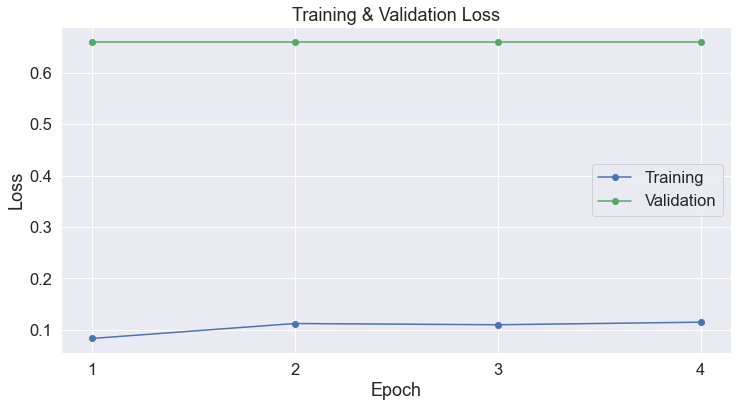

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.蓝色圆形，绿色圆形
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

5. Performance On Test Set

5.1 Prepare test data

In [45]:
import pandas as pd

df = pd.read_csv('C:/Users/DELL/Desktop/cola_public/raw/out_of_domain_dev.tsv',delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

print('Number of test sentences: {:,}\n'.format(df.shape[0]))

sentences = df.sentence.values
labels = df.label.values

input_ids = []
attention_masks = []

for sent in sentences:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



c:\Users\DELL\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


5.2. Evaluate on Test Set
With the test set prepared, we can apply our fine-tuned model to generate predictions on the test set.

In [49]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

for batch in prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)

    b_input_ids,b_input_mask,b_labels = batch

    with torch.no_grad():
      # Forward pass, calculate logit predictions.
        result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

    logits = result.logits

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
  
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('    DONE.')
print(predictions)
print(true_labels)

Predicting labels for 516 test sentences...
    DONE.
[array([[-1.6245862 ,  1.6909013 ],
       [-2.076171  ,  2.0534031 ],
       [-2.4781494 ,  2.4372704 ],
       [-2.1259592 ,  2.157166  ],
       [-1.7303714 ,  1.8149956 ],
       [-2.5833545 ,  2.497748  ],
       [-0.7663958 ,  0.8694747 ],
       [-1.6527071 ,  1.6872635 ],
       [-2.4592803 ,  2.4063418 ],
       [-2.5042977 ,  2.4651384 ],
       [-0.7369052 ,  0.9151673 ],
       [ 0.92674476, -0.7505584 ],
       [-2.5608535 ,  2.513698  ],
       [-0.71423686,  0.8423876 ],
       [-1.8106947 ,  1.7950352 ],
       [-1.640652  ,  1.6612793 ],
       [-1.6444349 ,  1.704366  ],
       [ 2.3374572 , -2.3082864 ],
       [-2.194101  ,  2.2065647 ],
       [-1.2966113 ,  1.4002564 ],
       [-2.194101  ,  2.2065647 ],
       [-1.1105722 ,  1.1990575 ],
       [-1.547154  ,  1.6045339 ],
       [-1.838447  ,  1.8685473 ],
       [-1.3963268 ,  1.448772  ],
       [-1.8942145 ,  1.9336442 ],
       [-1.2811569 ,  1.3798242 ],


We use MCC here because the classes are imbalanced:

In [50]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)


In [54]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')


# For each input batch...
for i in range(len(true_labels)):
  
    # The predictions for this batch are a 2-column ndarray (one column for "0" 
    # and one column for "1"). Pick the label with the highest value and turn this
    # in to a list of 0s and 1s.
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

    # Calculate and store the coef for this batch.  
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
    matthews_set.append(matthews)


Calculating Matthews Corr. Coef. for each batch...


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


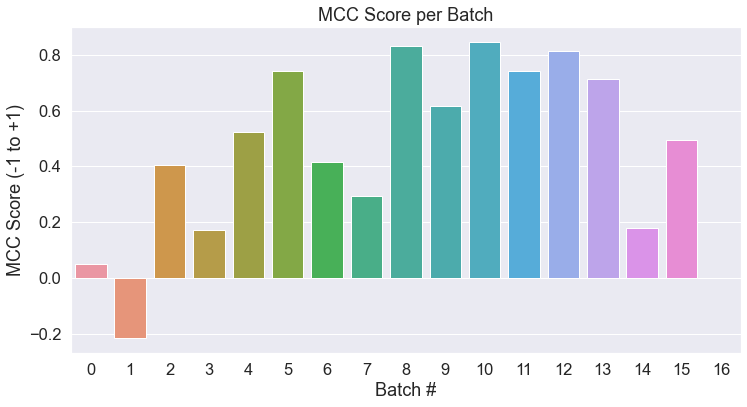

In [55]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [56]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.497
